In [1]:
from pycaret.classification import *


In [67]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')
print(dataset.shape)

(1020, 70)


In [26]:
dataset.head()

,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


# preproccesing

In [4]:
dataset.isnull().sum()

ser_num                0
ICU_LOS                0
LOS_Group              0
ICU_mortality          0
HOSP_mortality         0
28_mortality           0
90 days mortality      0
trauma                 0
metabolic              0
gastrointestinal       0
Sepsis                 0
age                    0
gender                 0
weight                 0
BMI                    0
APACHEII               0
active problems        0
background problems    0
feeding                0
Target_pro_day         0
pro_to_target_day0     0
pro_to_target_day1     0
pro_to_target_day2     0
pro_to_target_day3     0
pro_to_target_day4     0
pro_to_target_day5     0
pro_to_target_day6     0
pro_to_target_day7     0
pro_to_target_day8     0
pro_to_target_day9     0
pro_to_target_day10    0
pro_to_target_day11    0
pro_to_target_day12    0
pro_to_target_day13    0
Total_EN_pro           0
Total_PN_pro           0
EN_pro_day0            0
PN_pro_day0            0
EN_pro_day1            0
PN_pro_day1            0


In [5]:
dataset[dataset['age']=='NAN'].shape

(44, 70)

In [68]:
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [7]:
dataset.shape

(976, 70)

# try model we learned in class

In [69]:
y = dataset[['ICU_mortality']]

X = dataset[[
    'LOS_Group',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'
,'pro_to_target_day8'
,'pro_to_target_day9'
,'pro_to_target_day10'
,'pro_to_target_day11'
,'pro_to_target_day12'
,'pro_to_target_day13'
,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
,'EN_pro_day8'
,'PN_pro_day8'
,'EN_pro_day9'
,'PN_pro_day9'
,'EN_pro_day10'
,'PN_pro_day10'
,'EN_pro_day11'
,'PN_pro_day11'
,'EN_pro_day12'
,'PN_pro_day12'
,'EN_pro_day13'
,'PN_pro_day13'  
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]
print(dataset.shape)


(976, 70)


In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['active problems'] = le.fit_transform(X['active problems'].astype(str))
X['background problems'] = le.fit_transform(X['background problems'].astype(str))
X['gender'] = le.fit_transform(X['gender'].astype(str))
X['feeding'] = le.fit_transform(X['feeding'].astype(str))
X['LOS_Group'] = le.fit_transform(X['LOS_Group'].astype(str))

In [65]:
X.head()

,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,active problems,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,0,0,1,0,1,72,0,65.0,23.875115,1,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,0,0,1,0,1,58,1,101.0,32.979592,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,1,0,0,1,1,44,1,70.0,22.857143,3,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,0,0,1,1,0,71,0,48.0,19.227688,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,0,1,1,1,0,60,0,85.0,32.791945,0,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [57]:
y.value_counts()

ICU_mortality
0                741
1                235
dtype: int64

In [ ]:
# Use the model_selection module to separate training and testing datasets
from sklearn import model_selection
# define seed for reproducibility
seed = 1
# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)



# Now that we have our dataset, we can start building algorithms! We'll need to import each algorithm we plan on using
# from sklearn.  We also need to import some performance metrics, such as accuracy_score and classification_report.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# define scoring method
scoring = 'recall'

# Define models to train
names = ["Nearest Neighbors",
         "Decision Tree", "Random Forest",  "AdaBoost",
          "SVM Linear"]

classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=5,),
    AdaBoostClassifier(),
    SVC(kernel = 'linear'), 

]

models = zip(names, classifiers)

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Nearest Neighbors: 0.170312 (0.057516)
Decision Tree: 0.153164 (0.081436)
Random Forest: 0.096357 (0.092305)
AdaBoost: 0.168519 (0.097215)


# best model by pycaret

In [47]:
x = dataset[[
'LOS_Group',
'ICU_mortality',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'
,'pro_to_target_day8'
,'pro_to_target_day9'
,'pro_to_target_day10'
,'pro_to_target_day11'
,'pro_to_target_day12'
,'pro_to_target_day13'
,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
,'EN_pro_day8'
,'PN_pro_day8'
,'EN_pro_day9'
,'PN_pro_day9'
,'EN_pro_day10'
,'PN_pro_day10'
,'EN_pro_day11'
,'PN_pro_day11'
,'EN_pro_day12'
,'PN_pro_day12'
,'EN_pro_day13'
,'PN_pro_day13'  
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]
x.shape

(976, 65)

In [52]:
from pycaret.classification import *

#dataset = dataset.sample(frac=0.38, random_state=120)
#data_unseen = dataset.drop(data.index)


model_setup = setup(data=x, target='ICU_mortality', data_split_stratify = True,normalize = True)

,Description,Value
0,session_id,6546
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(976, 65)"
5,Missing Values,False
6,Numeric Features,53
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [53]:
#for more info: https://pycaret.org/tune-model/
model = create_model("rf")
tuned_rf = tune_model(model, optimize = 'recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9275,0.9519,1.0000,0.7727,0.8718,0.8224,0.8357
1,0.8696,0.9135,1.0000,0.6538,0.7907,0.7019,0.7353
2,0.8841,0.9231,1.0000,0.6800,0.8095,0.7305,0.7585
3,0.8088,0.8750,1.0000,0.5517,0.7111,0.5854,0.6433
4,0.8088,0.8534,0.9375,0.5556,0.6977,0.5709,0.6127
5,0.9118,0.9423,1.0000,0.7273,0.8421,0.7830,0.8021
6,0.8824,0.9231,1.0000,0.6667,0.8000,0.7213,0.7511
7,0.9265,0.9519,1.0000,0.7619,0.8649,0.8156,0.8298
8,0.9118,0.9423,1.0000,0.7273,0.8421,0.7830,0.8021
9,0.9118,0.9412,1.0000,0.7391,0.8500,0.7895,0.8076


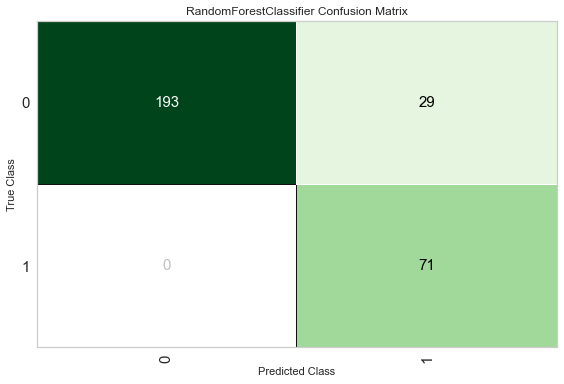

In [54]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [ ]:
model_setup = setup(data=x, target='ICU_mortality', data_split_stratify = True,normalize = True,pca = True, pca_components = 10
)

In [ ]:
#for more info: https://pycaret.org/tune-model/
model = create_model("rf")
tuned_rf = tune_model(model, optimize = 'recall')

In [ ]:
#best = compare_models()
#print(best)

In [ ]:
#for more info: https://pycaret.org/tune-model/
#model = create_model("nb")
#tuned_rf = tune_model(model, optimize = 'recall')